# 3. Projekat - Neuronske mreže

## Priprema podataka

In [318]:
#importovanje odgovarajucih biblioteka
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from math import sqrt,pi, exp, pow
import statistics
import random as rand
from functools import reduce
#sklearn preprocesiranje
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
#za detekciju outliera
from sklearn.ensemble import IsolationForest
#sklearn
from sklearn.model_selection import train_test_split
#neuronske mreze
from keras.models import Sequential
from keras.layers import Dense, Dropout, Softmax
from keras.utils import to_categorical
from keras.layers import Flatten

In [384]:
# ucitavanje dataset-a za obradu 
file_name = "Hotel Reservations.csv"
data = pd.read_csv(file_name)
data.head(15)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0    INN00001             2               0                     1   
1    INN00002             2               0                     2   
2    INN00003             1               0                     2   
3    INN00004             2               0                     0   
4    INN00005             2               0                     1   
5    INN00006             2               0                     0   
6    INN00007             2               0                     1   
7    INN00008             2               0                     1   
8    INN00009             3               0                     0   
9    INN00010             2               0                     0   
10   INN00011             1               0                     1   
11   INN00012             1               0                     2   
12   INN00013             2               0                     2   
13   INN00014             1               0                     2   
14   INN00015             2               0                     0   

    no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                   2       Meal Plan 1                           0   
1                   3      Not Selected                           0   
2                   1       Meal Plan 1                           0   
3                   2       Meal Plan 1                           0   
4                   1      Not Selected                           0   
5                   2       Meal Plan 2                           0   
6                   3       Meal Plan 1                           0   
7                   3       Meal Plan 1                           0   
8                   4       Meal Plan 1                           0   
9                   5       Meal Plan 1                           0   
10                  0      Not Selected                           0   
11                  1       Meal Plan 1                           0   
12                  1      Not Selected                           0   
13                  0       Meal Plan 1                           0   
14                  2       Meal Plan 1                           0   

   room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0         Room_Type 1        224          2017             10             2   
1         Room_Type 1          5          2018             11             6   
2         Room_Type 1          1          2018              2            28   
3         Room_Type 1        211          2018              5            20   
4         Room_Type 1         48          2018              4            11   
5         Room_Type 1        346          2018              9            13   
6         Room_Type 1         34          2017             10            15   
7         Room_Type 4         83          2018             12            26   
8         Room_Type 1        121          2018              7             6   
9         Room_Type 4         44          2018             10            18   
10        Room_Type 1          0          2018              9            11   
11        Room_Type 4         35          2018              4            30   
12        Room_Type 1         30          2018             11            26   
13        Room_Type 1         95          2018             11            20   
14        Room_Type 1         47          2017             10            20   

   market_segment_type  repeated_guest  no_of_previous_cancellations  \
0              Offline               0                             0   
1               Online               0                             0   
2               Online               0                             0   
3               Online               0                             0   
4               Online               0                             0   
5               Online               0                          

In [215]:
# provera velicine dataseta i broja kolona
data.shape

(36275, 19)

Ovime zaključujemo da u datasetu ima 36.275 vrsta i 19 kolona

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [217]:
#provera tipova podataka
data.dtypes
# kategoricke vrednosti:
#   type_of_meal_plan, 
#   room_type_reserved, 
#   market_segment_type, 
#   booking_status

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [218]:
#provera da li ima null vrednosti
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* Nema praznih (null) vrednosti, kao ni duplikata.
* Primetile smo da su rezervacije cesce za dane u toku radne nedelje i to u proseku za 2 noci. 
* Omiljena je soba tipa 1. 
* Redje su rezervacije za vikend. 
* Najcesce su rezervacije sa 2 ili 1 odraslom osobom. 
* Retke su rezervacije sa decom i uglavnom gosti ne zahtevaju svoje parking mesto.




In [219]:
# deskriptivna statistika
data.describe().transpose()

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

### Balansiranost klasa

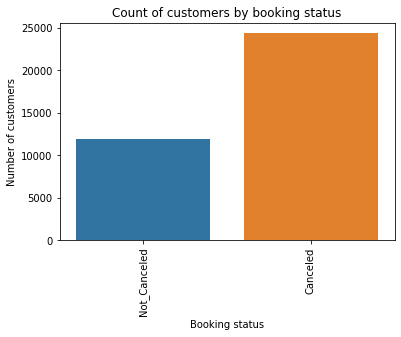

In [386]:
#provera balansiranosti dataseta
labels = pd.unique(data['booking_status'])
countByClass = data.groupby('booking_status').size().sort_values()
sns.barplot(x = labels, y = countByClass,data=data)
plt.title('Count of customers by booking status')
plt.xlabel('Booking status')
plt.xticks(rotation=90)
plt.ylabel('Number of customers')
plt.show()

Kao sto se vidi, podaci nisu dobro balansirani, pa je potrebno izvrsiti oversampling

In [387]:
# enkodiranje bookin_status --> Not Canceled - 0, Canceled - 1
data.booking_status = data.booking_status.replace({"Not_Canceled":0, "Canceled":1})

In [388]:
#izbacivanje kolone Booking_ID buduci da u konkretnom slucaju analize nije relevantna
data = data.drop("Booking_ID", axis = 'columns')

In [389]:
#radimo enkodiranje ostalih kategoricnih vrednosti u numericke vrednosti
categorical_cols = ['type_of_meal_plan','room_type_reserved','market_segment_type']
for col in categorical_cols:
    print(data[col].unique())
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']


Data before oversampling: (36275, 18)
Data after oversampling:  (48780, 18)


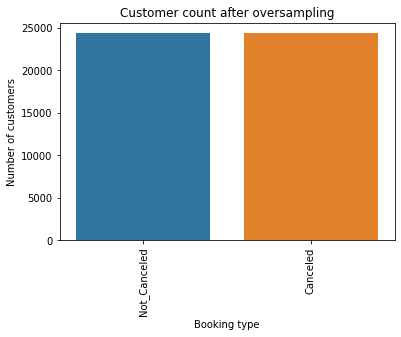

In [390]:
# na osnovu bar chart-a se moze zakljuciti da klase nisu adekvatno balansirane, 
# stoga radimo oversampling
def oversampling(data):
    oversample = SMOTE()
    X_oversample, y_oversample = oversample.fit_resample(data[data.columns.difference(['booking_status'])], data['booking_status'])
    data_frame = pd.DataFrame(X_oversample)
    data_frame['booking_status'] = y_oversample
    print('Data before oversampling:', data.shape)
    print('Data after oversampling: ', X_oversample.shape)
    count_oversample = X_oversample.groupby('booking_status').size().sort_values()
    sns.barplot(x = labels, y = count_oversample, data = X_oversample)
    plt.title('Customer count after oversampling')
    plt.xlabel('Booking type')
    plt.xticks(rotation=90)
    plt.ylabel('Number of customers')
    plt.show()
    return data_frame
data_balanced = oversampling(data)

### Pretpostavke

1. Posto je najposecenija soba tipa 1, pretpostavljamo da je to ujedno i najpovoljniji tip sobe.
2. Pretpostavljamo da su rezervacije napravljene na dan dolaska ili par dana pre dolaska u hotel gotovo 100% sigurne i nece biti otkazane.
3. Pretpostavljamo da su rezervacije za 7 ili vise dana boravka manje podlozne otkazivanju.
4. Pretpostavljamo da je  period u godini 
kada se najcesce desavaju otkazivanja rezervacija letnji period kada je i sezona.
5. Pretpostavljamo da novi gosti cesce otkazuju rezervacije od onih koji su vec odsedali u hotelu.



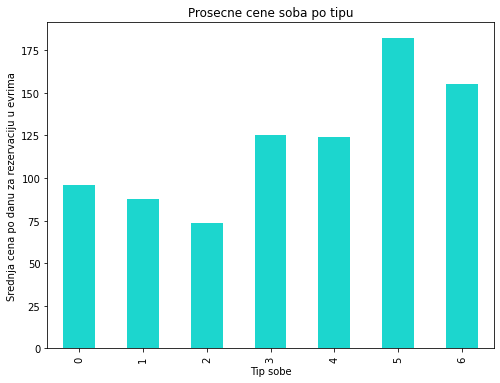

In [367]:
# 1. Posto je najposecenija soba tipa 1, to je  i najpovoljniji tip sobe.
# grupisanje podataka prema tipu sobe i prosecnoj ceni po sobi
room_type_prices = data.groupby('room_type_reserved')['avg_price_per_room'].mean()

# graf za prikaz prosecnih cena prema tipu sobe
room_type_prices.plot(kind='bar', figsize=(8, 6), color='#1CD6CE')
plt.xlabel('Tip sobe')
plt.ylabel('Srednja cena po danu za rezervaciju u evrima')
plt.title('Prosecne cene soba po tipu')
plt.show()

Najpovoljniji tip sobe je ipak tip broj 3, tako da pretposatvka nije bila tacna.

Text(0, 0.5, 'Ucestanost')

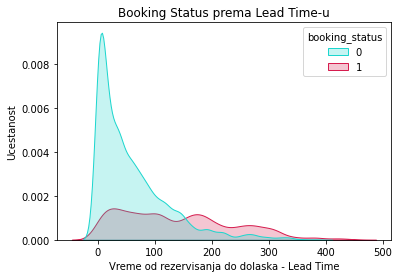

In [368]:
# 2. Rezervacije napravljene na dan dolaska ili par dana pre dolaska u hotel su gotovo 100% sigurne i nece biti otkazane.
colors = ['#1CD6CE', '#D61C4E']
sns.kdeplot(data=data, x='lead_time', hue='booking_status', palette=colors, fill=True)

plt.title('Booking Status prema Lead Time-u')
plt.xlabel('Vreme od rezervisanja do dolaska - Lead Time')
plt.ylabel('Ucestanost')

Definitivno rezervacije napravljene za dan dolaska ili par dana pre dolaska su najsigurnije rezervacije i broj otkazivanja je drasticno manji. 

Text(0, 0.5, 'Ucestanost')

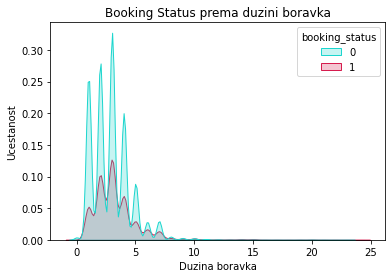

In [364]:
# 3. Rezervacije za 7 ili vise dana boravka su manje podlozne otkazivanju.
data['length_of_stay'] = data['no_of_weekend_nights'] + data['no_of_week_nights']

colors = ['#1CD6CE', '#D61C4E']
sns.kdeplot(data=data, x='length_of_stay', hue='booking_status', palette=colors, fill=True)

plt.title('Booking Status prema duzini boravka')
plt.xlabel('Duzina boravka')
plt.ylabel('Ucestanost')

Za boravke od nedelju dana ili vise mnogo je manji broj otkazanih rezervacija, dok je najveci broj otkazivanja za boravke od prosecno 3 dana.

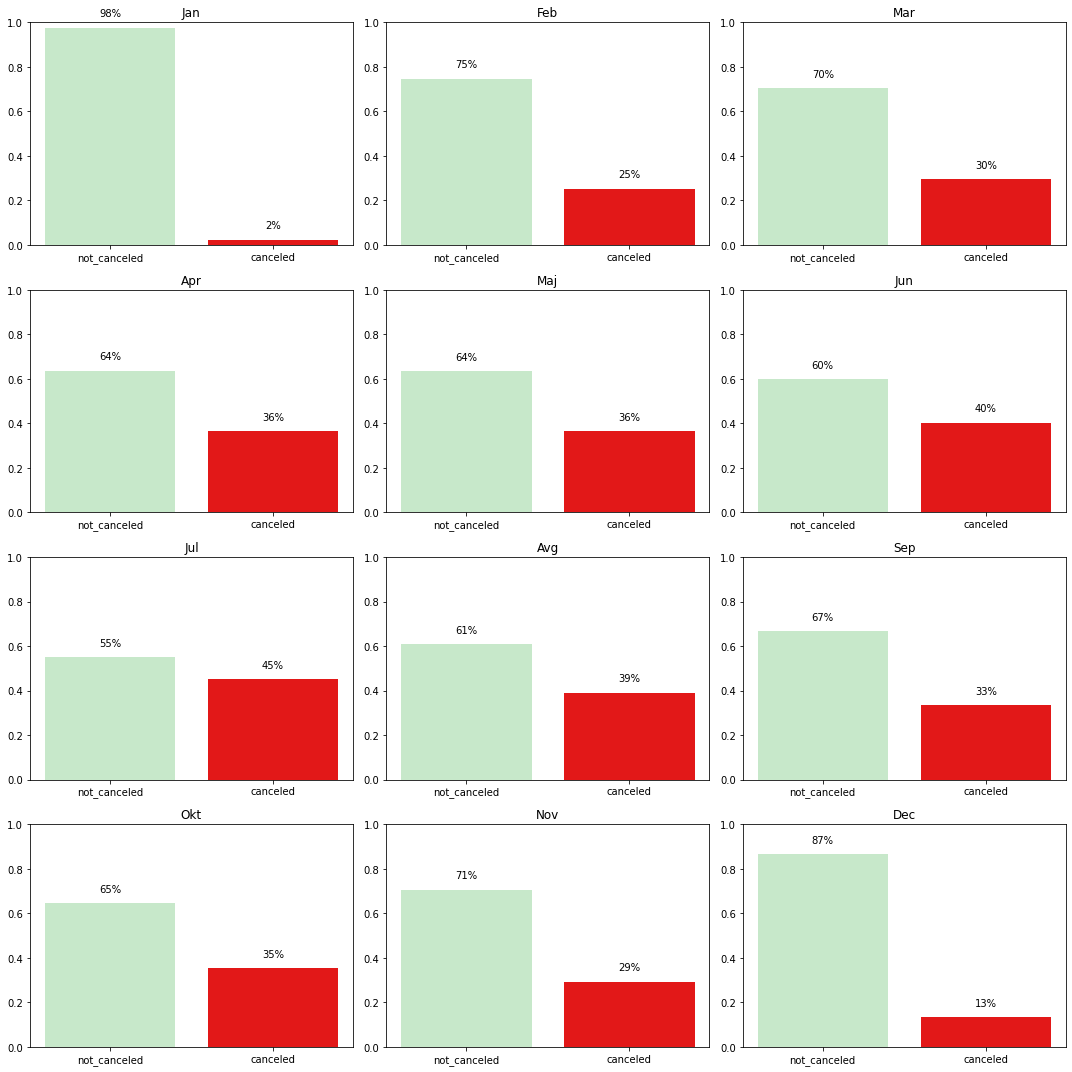

In [365]:
# 4. najvise otikazivanja ima u letnjem periodu
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun', 'Jul', 'Avg', 'Sep', 'Okt', 'Nov', 'Dec']

for i, month in enumerate(range(1, 13)):
    ax = axes[i]
    df_month = data[data['arrival_month'] == month]
    ax.set_title(months[i])
    ax.set_ylim(0, 1)
    for j, val in enumerate(df_month['booking_status'].value_counts(normalize=True).sort_index()):
        ax.bar(['not_canceled', 'canceled'][j], val, color = ['#C7E8CA', '#E21818'][j])
        ax.text(['not_canceled', 'canceled'][j], val+0.05, f"{val*100:.0f}%", ha='center')
    
plt.tight_layout()
plt.show()

Mozemo da primetimo da se veci broj otkazivanja javlja od Juna do Avgusta, a najmanji broj otkazivanja je definitivno u Januru. Dakle, prva pretpostavka je istinita.

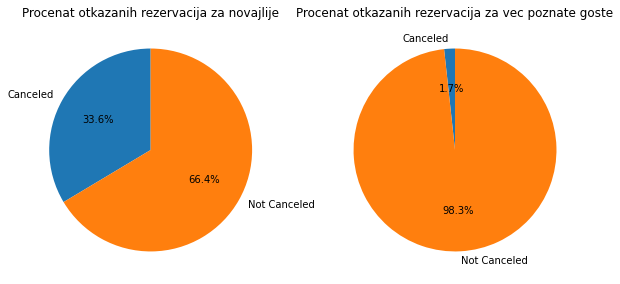

In [380]:
# 5. Vise otkazuju novi gosti koji nikada do sada nisu bili u hotelu.
new_guests_not_canceled, new_guests_canceled, old_guests_not_canceled, old_guests_canceled = data.groupby("repeated_guest")["booking_status"].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'aspect': 'equal'})
ax[0].pie([new_guests_canceled, new_guests_not_canceled], labels = ["Canceled" ,"Not Canceled"], autopct='%1.1f%%', startangle=90)
ax[0].set_title("Procenat otkazanih rezervacija za novajlije")
ax[1].pie([old_guests_canceled,old_guests_not_canceled], labels=["Canceled", "Not Canceled"], autopct='%1.1f%%', startangle=90)
ax[1].set_title("Procenat otkazanih rezervacija za vec poznate goste");

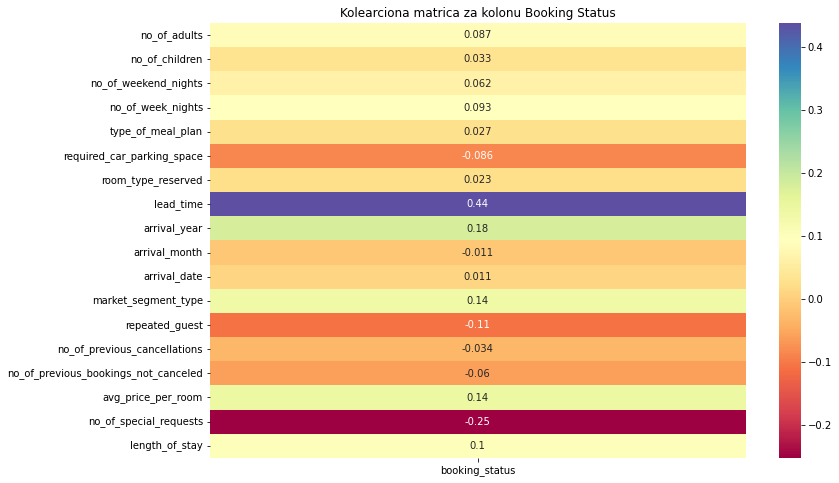

In [382]:
# korelaciona matrica za Booking status
data_copy = data.copy()
data_copy['booking_status'] = pd.get_dummies(data_copy['booking_status'])[1]

corr_matrix = data_copy.corr()["booking_status"]
corr_matrix = corr_matrix.drop("booking_status", axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.to_frame(), cmap="Spectral", annot=True)
plt.title("Kolearciona matrica za kolonu Booking Status")
plt.show()

### Normalizacija

In [391]:
# radimo MinMax skaliranje i pamtimo novi dataset kako bismo videle
# da li ce rezultati  biti bolji nakon normalizacije podataka
numeric_cols = data.select_dtypes(include=['int64','float64']).columns
minmax_scaler = MinMaxScaler()
# pravimo kopiju da originalni dataset ne bi bio promenjen
data_norm = data_balanced.copy()
data_norm[numeric_cols]= minmax_scaler.fit_transform(data_norm[numeric_cols])
data_norm.head()

arrival_date  arrival_month  arrival_year  avg_price_per_room  lead_time  \
0      0.033333       0.818182           0.0            0.120370   0.505643   
1      0.166667       0.909091           1.0            0.197556   0.011287   
2      0.900000       0.090909           1.0            0.111111   0.002257   
3      0.633333       0.363636           1.0            0.185185   0.476298   
4      0.333333       0.272727           1.0            0.175000   0.108352   

   market_segment_type  no_of_adults  no_of_children  \
0                 0.75          0.50             0.0   
1                 1.00          0.50             0.0   
2                 1.00          0.25             0.0   
3                 1.00          0.50             0.0   
4                 1.00          0.50             0.0   

   no_of_previous_bookings_not_canceled  no_of_previous_cancellations  \
0                                   0.0                           0.0   
1                                   0.0                           0.0   
2                                   0.0                           0.0   
3                                   0.0                           0.0   
4                                   0.0                           0.0   

   no_of_special_requests  no_of_week_nights  no_of_weekend_nights  \
0                     0.0           0.117647              0.142857   
1                     0.2           0.176471              0.285714   
2                     0.0           0.058824              0.285714   
3                     0.0           0.117647              0.000000   
4                     0.0           0.058824              0.142857   

   repeated_guest  required_car_parking_space  room_type_reserved  \
0             0.0                         0.0                 0.0   
1             0.0                         0.0                 0.0   
2             0.0                         0.0                 0.0   
3             0.0                         0.0                 0.0   
4             0.0                         0.0                 0.0   

   type_of_meal_plan  booking_status  
0                0.0             0.0  
1                1.0             0.0  
2                0.0             1.0  
3                0.0             1.0  
4                1.0             1.0

In [392]:
# provera distribucije vrednosti za output kolonu
data_norm['booking_status'].value_counts()/data.shape[0]

0.0    0.672364
1.0    0.672364
Name: booking_status, dtype: float64

### Outlieri

In [393]:
#detekcija outliera pomocu iqr
def find_outliers(df, col_name):
    q1 = data_norm[col_name].quantile(0.25)
    q3=  data_norm[col_name].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = data_norm[((data_norm[col_name]<(q1-1.5*iqr)) | (data_norm[col_name]>(q3+1.5*iqr)))]
    return outliers
cols_to_use = data_norm[data_norm.columns]
total_outlier_num=0
cols = cols_to_use.columns.values
num_cols=[]
for col in cols:
    num = find_outliers(cols_to_use, col)
    num_cols.append(len(num))
new_data_frame = pd.DataFrame()
new_data_frame['Feature']= cols
new_data_frame['Number of Outliers']= num_cols
with pd.option_context('display.max_rows', None): 
    display(new_data_frame.sort_values(by='Number of Outliers', ascending = False))

Feature  Number of Outliers
6                           no_of_adults               13241
16                     type_of_meal_plan               11819
15                    room_type_reserved               11067
2                           arrival_year                7825
7                         no_of_children                3339
3                     avg_price_per_room                2094
14            required_car_parking_space                1141
13                        repeated_guest                 938
8   no_of_previous_bookings_not_canceled                 817
10                no_of_special_requests                 761
5                    market_segment_type                 550
4                              lead_time                 526
12                  no_of_weekend_nights                 440
11                     no_of_week_nights                 430
9           no_of_previous_cancellations                 349
0                           arrival_date                   0
1                          arrival_month                   0
17                        booking_status                   0

In [394]:
def delete_outliers(data):
    isolation_forest = IsolationForest(n_estimators = 100, contamination = 0.05, max_samples = 'auto')
    outlier_prediction = isolation_forest.fit_predict(data_norm[data_norm.columns.difference(['Class'])].values)
    print("Number of normal values detected: {}".format(outlier_prediction[outlier_prediction  == 1].sum()))
    print("Number of outliers detected: {}".format(abs(outlier_prediction[outlier_prediction == -1].sum())))
    data_no_outliers = data_norm.copy()
    data_no_outliers['Is_Outlier'] = outlier_prediction
    data_no_outliers.drop(data_no_outliers[(data_no_outliers['Is_Outlier'] == -1)].index, axis = 0, inplace=True)
    data_no_outliers = data_no_outliers[data_no_outliers.columns.difference(['Is_Outlier'])]
    print('Number of values after eliminating outliers: ' + str(len(data_no_outliers)))
    return data_no_outliers
data_no_outliers = delete_outliers(data_norm)
data_norm = data_no_outliers

Number of normal values detected: 46341
Number of outliers detected: 2439
Number of values after eliminating outliers: 46341


### Podela dataseta

In [395]:
#podesavanje ulaznih i izlazne kolone
input_cols = data_norm[data.columns.difference(['booking_status'])]
output_col = data_norm['booking_status']

In [396]:
#podela na train, test i validation u odnosu 60:20:20
X_train, X_test, y_train, y_test = train_test_split(input_cols, output_col, test_size = 0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 1)

### Kreiranje modela - Binary Cross-Entropy

In [344]:
# podesavanje slojeva
model = Sequential()
model.add(Dense(512,input_dim = input_cols.shape[1], activation='relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

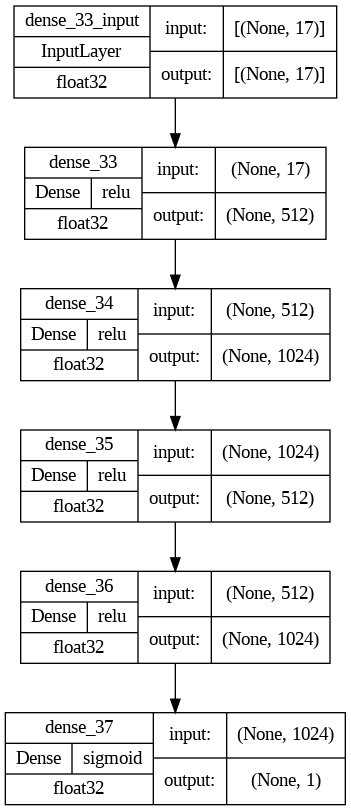

In [278]:
model_img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

Binary Crossentropy

In [313]:
# kompajliraje modela
model.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics=['accuracy']
    )


In [314]:
# Koristimo early stopping metodu da bismo mogle da navedemo veliki broj epoha
# koje ce se samostalno zaustaviti kada performanse modela prestanu da se 
# poboljsavaju nad skupom podataka za trening
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

In [315]:
# treniranje modela
history = model.fit(
    X_train, y_train, 
    validation_data = (X_val, y_val), 
    epochs = 200, 
    batch_size = 512,
    callbacks=[callback]
  )

Epoch 1/200
55/55 [==============================] - 10s 158ms/step - loss: 0.4991 - accuracy: 0.7578 - val_loss: 0.4449 - val_accuracy: 0.7908
Epoch 2/200
55/55 [==============================] - 6s 104ms/step - loss: 0.4402 - accuracy: 0.7972 - val_loss: 0.4243 - val_accuracy: 0.8033
Epoch 3/200
55/55 [==============================] - 7s 135ms/step - loss: 0.4125 - accuracy: 0.8108 - val_loss: 0.4068 - val_accuracy: 0.8110
Epoch 4/200
55/55 [==============================] - 6s 106ms/step - loss: 0.3968 - accuracy: 0.8211 - val_loss: 0.3941 - val_accuracy: 0.8185
Epoch 5/200
55/55 [==============================] - 6s 116ms/step - loss: 0.3792 - accuracy: 0.8305 - val_loss: 0.3917 - val_accuracy: 0.8173
Epoch 6/200
55/55 [==============================] - 7s 124ms/step - loss: 0.3717 - accuracy: 0.8332 - val_loss: 0.3628 - val_accuracy: 0.8411
Epoch 7/200
55/55 [==============================] - 6s 106ms/step - loss: 0.3571 - accuracy: 0.8416 - val_loss: 0.3817 - val_accuracy: 0.829

Evaluacija tačnosti nad test podacima

In [316]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy: ', test_acc)

290/290 - 1s - loss: 0.3086 - accuracy: 0.8722 - 1s/epoch - 4ms/step

Test accuracy:  0.8721544742584229


<AxesSubplot:title={'center':'Accuracy'}>

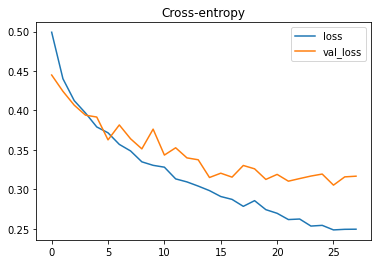

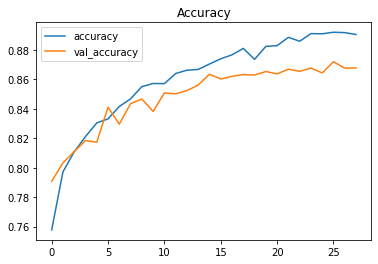

In [317]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

Kreiranje predikcija

In [285]:
probability_model = Sequential([model, Softmax()])

In [286]:
predictions = probability_model.predict(X_test)

305/305 [==============================] - 1s 4ms/step


In [287]:
predictions[0]

array([0.99999994], dtype=float32)

### Kreiranje modela - Custom Loss Function

In [397]:
import keras.backend as K

def custom_loss_function(y_true, y_pred):
    loss = K.mean(tf.square(y_pred - y_true) 
      + abs(0.1 * (y_pred-1)) 
      + abs(0.4 * (y_pred+1)), axis=-1)

    return loss

In [398]:
# podesavanje slojeva
model = Sequential()
model.add(Dense(512,input_dim = input_cols.shape[1], activation='relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [400]:
# kompajliraje modela
model.compile(
    optimizer = 'adam', 
    loss = custom_loss_function, 
    metrics=['accuracy']
    )


In [401]:
# treniranje modela
history = model.fit(
    X_train, y_train, 
    validation_data = (X_val, y_val), 
    epochs = 200, 
    batch_size = 512,
    callbacks=[callback]
  )

Epoch 1/200
55/55 [==============================] - 9s 139ms/step - loss: 0.8009 - accuracy: 0.7193 - val_loss: 0.7798 - val_accuracy: 0.7882
Epoch 2/200
55/55 [==============================] - 6s 107ms/step - loss: 0.7732 - accuracy: 0.7883 - val_loss: 0.7729 - val_accuracy: 0.7994
Epoch 3/200
55/55 [==============================] - 8s 147ms/step - loss: 0.7681 - accuracy: 0.7984 - val_loss: 0.7832 - val_accuracy: 0.7244
Epoch 4/200
55/55 [==============================] - 7s 124ms/step - loss: 0.7610 - accuracy: 0.8082 - val_loss: 0.7625 - val_accuracy: 0.8049
Epoch 5/200
55/55 [==============================] - 7s 136ms/step - loss: 0.7556 - accuracy: 0.8227 - val_loss: 0.7624 - val_accuracy: 0.8118
Epoch 6/200
55/55 [==============================] - 6s 105ms/step - loss: 0.7516 - accuracy: 0.8318 - val_loss: 0.7564 - val_accuracy: 0.8305
Epoch 7/200
55/55 [==============================] - 7s 132ms/step - loss: 0.7487 - accuracy: 0.8338 - val_loss: 0.7551 - val_accuracy: 0.8167

In [402]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy: ', test_acc)

290/290 - 1s - loss: 0.7324 - accuracy: 0.8623 - 1s/epoch - 4ms/step

Test accuracy:  0.8623368144035339


<AxesSubplot:title={'center':'Accuracy'}>

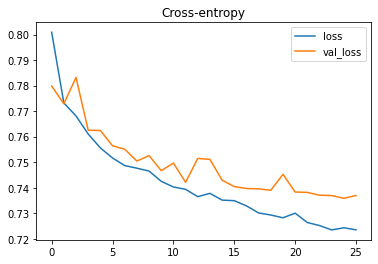

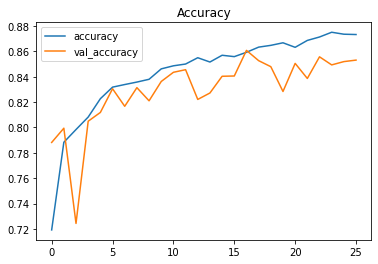

In [403]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")